In [1]:
def train_test_split(X, Y, N_train):
    d, N = X.shape
    
    # Define the array of indices
    idx = np.arange(0, N)
    
    # Shuffle the indices
    np.random.shuffle(idx)
    
    # Extract train and test indices
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    
    # Extract data
    X_train = X[:, train_idx]
    Y_train = Y[:, train_idx] #its important to not to loose the information of X and Y!! (Y contains the labels of the digit)
    
    X_test = X[:, test_idx]
    Y_test = Y[:, test_idx]
    
    return X_train, Y_train, X_test, Y_test

## Classification of MNIST Digits with SVD Decomposition.

1. In the first exercise, we will implement the binary classification algorithm for the digits 3 and 4 of MNIST following the ideas explained above.

Load the **MNIST dataset** contained in **./data/MNIST.mat** with the function `scipy.io.loadmat`.
This dataset, which is loaded in the form of a 256 ×1707 matrix $X$, contains the flattened version
of 1707 16 × 16 grayscale handwritten digits. Moreover, from the same file it is possible to load
a vector I of length 1707 such that the i-th element of I is the true digit represented by the i-th
image of X.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd

In [3]:
mnist = scipy.io.loadmat("dataset/MNIST.mat")
print(mnist)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Mar 28 22:40:02 2017', '__version__': '1.0', '__globals__': [], 'X': array([[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.1645, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.086 , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]]), 'I': array([[6, 5, 4, ..., 7, 9, 8]], dtype=uint8)}


In [4]:
X = mnist['X']
y = mnist['I']
X.shape, y.shape

((256, 1707), (1, 1707))

Visualize a bunch of datapoints of X with the function `plt.imshow`

Extracting random data points from the dataset:


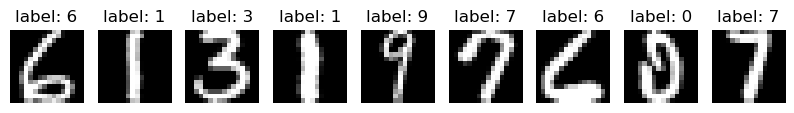

In [5]:
idx = np.random.choice(X.shape[1], size=9, replace=False)
fig, axes = plt.subplots(1,9, figsize=(10,10))
print("Extracting random data points from the dataset:")

for i, index in enumerate(idx):
    image = X[:, index].reshape(16,16)
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(f"label: {y[0, index]}")
    axes[i].axis("off")

Extract from X those columns that corresponds to digits 3 or 4. Those digits represents the
classes C1 and C2 defined above.


In [6]:
C1, C2 = 3, 4
idx = (y[0] == C1) | (y[0] == C2)
X_sub = X[:, idx]
y_sub = y[:, idx]
# print(X_sub.shape, y_sub.shape, y.shape)
print(f"Unique values of classes in y: {np.unique(y_sub)}")

unique values of classes in y: [3 4]


Split the obtained dataset in training and testing. From now on, we will only consider the training
set. The test set will be only used at the end of the exercise to test the algorithm.

In [7]:
N_train = int(0.8 * y_sub.shape[1]) # 80% of the dataset
X_train, y_train, X_test, y_test = train_test_split(X_sub, y_sub, N_train)

• Create the matrices X1 and X2 defined above from X

In [8]:
X1 = X_train[:,y_train[0] == C1]
X2 = X_train[:,y_train[0] == C2]

Compute the SVD decomposition of X1 and X2 with `np.linalg.svd(matrix, full matrices=False)`
and denote the U-part of the two decompositions as U1 and U2

In [9]:
U1, s1, VT1 = np.linalg.svd(X1, full_matrices=False)

U2, s2, VT2 = np.linalg.svd(X2, full_matrices=False)

Take an unknown digit y from the test set, and compute $y^⊥_1 = U_1(U^T_1y)$ and $y^⊥_2 = U_2(U^T_2y)$.  

Compute the distances $d_1 = ||y − y^⊥_1||_2$ and $d_2 = ||y − y^⊥_2||_2$ and classify $y$:  
- to **C1** if $d1 < d2$; 
- to **C2** if $d2 < d1$.

Extracting a random datapoint from the sub-dataset. True Label: 4


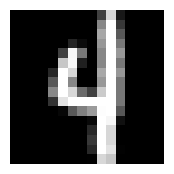

The sampled digit was classified as: 4


In [10]:
# extracting 10 indexes of samples
index = np.random.choice(y_test.shape[1], size = 10, replace=False)
y_true = X_test[:, index[0]]

print(f"Extracting a random datapoint from the sub-dataset. True Label: {y_test[0,index[0]]}")
plt.figure(figsize=(2,2))
plt.imshow(y_true.reshape(16,16), cmap='gray')
plt.axis('off')
plt.show()

y_1 = U1 @ (U1.T @ y_true)
y_2 = U2 @ (U2.T @ y_true)
d1 = np.linalg.norm(y_true - y_1, 2)
d2 = np.linalg.norm(y_true - y_2, 2)

if d1<=d2:
    classification = C1
else:
    classification = C2
print(f"The sampled digit was classified as: {classification}")

Repeat the experiment for different values of y in the test set. Compute the misclassification
number for this algorithm.

In [11]:
N_test = y_test.shape[1]
size = 10

idx = np.random.choice(N_test, size = size, replace=False)
correct_classification = 0

print(f"Classifying {size} samples from the sub-dataset.\n", end='\n')
for index in idx:
    y_true = X_test[:, index]

    print(f"Extracting a random datapoint from the dataset. True Label: {y_test[0,index]}")

    y_1 = U1 @ (U1.T @ y_true)
    y_2 = U2 @ (U2.T @ y_true)
    d1 = np.linalg.norm(y_true - y_1, 2)
    d2 = np.linalg.norm(y_true - y_2, 2)

    if d1<=d2:
        classification = C1
    else:
        classification = C2
    print(f"The sampled digit was classified as: {classification}")
    if classification == y_test[0,index]:
        correct_classification += 1
print(f"\nPercentage of correct classification: {round(correct_classification/size, 2)*100}%")

Classifying 10 samples from the sub-dataset.

Extracting a random datapoint from the dataset. True Label: 3
The sampled digit was classified as: 3
Extracting a random datapoint from the dataset. True Label: 4
The sampled digit was classified as: 4
Extracting a random datapoint from the dataset. True Label: 3
The sampled digit was classified as: 3
Extracting a random datapoint from the dataset. True Label: 3
The sampled digit was classified as: 3
Extracting a random datapoint from the dataset. True Label: 4
The sampled digit was classified as: 4
Extracting a random datapoint from the dataset. True Label: 3
The sampled digit was classified as: 3
Extracting a random datapoint from the dataset. True Label: 3
The sampled digit was classified as: 3
Extracting a random datapoint from the dataset. True Label: 3
The sampled digit was classified as: 3
Extracting a random datapoint from the dataset. True Label: 3
The sampled digit was classified as: 3
Extracting a random datapoint from the datase

Repeat the experiment for different digits other than 3 or 4. There is a relationship between the
visual similarity of the digits and the classification error?

In [12]:
print("Computing all the cross-classification between 2 classes:\n", end='\n')

C_done = []
for C1 in range(1,10):
    C_done.append(C1)
    for C2 in range(1,10):
        if C2 in C_done:
            continue
            
        idx = (y[0] == C1) | (y[0] == C2)
        X_sub = X[:, idx]
        y_sub = y[:, idx]

        N_train = int(0.8 * y_sub.shape[1])
        X_train, y_train, X_test, y_test = train_test_split(X_sub, y_sub, N_train)

        X1 = X_train[:,y_train[0] == C1]
        X2 = X_train[:,y_train[0] == C2]

        U1, s1, VT1 = np.linalg.svd(X1, full_matrices=False)
        U2, s2, VT2 = np.linalg.svd(X2, full_matrices=False)
        
        idx = np.random.choice(y_test.shape[1], size = 10, replace=False)
        correct_classification = 0

        for index in idx:
            y_true = X_test[:, index]

            y_1 = U1 @ (U1.T @ y_true)
            y_2 = U2 @ (U2.T @ y_true)
            d1 = np.linalg.norm(y_true - y_1, 2)
            d2 = np.linalg.norm(y_true - y_2, 2)

            if d1<=d2:
                classification = C1
            else:
                classification = C2
                
            if classification == y_test[0,index]:
                correct_classification += 1
        print(f"Percentage of correct classification between classes {C1} and {C2}: {round(correct_classification/10, 2)*100}%")

Computing all the cross-classification between 2 classes:

Percentage of correct classification between classes 1 and 2: 100.0%
Percentage of correct classification between classes 1 and 3: 100.0%
Percentage of correct classification between classes 1 and 4: 70.0%
Percentage of correct classification between classes 1 and 5: 100.0%
Percentage of correct classification between classes 1 and 6: 100.0%
Percentage of correct classification between classes 1 and 7: 90.0%
Percentage of correct classification between classes 1 and 8: 90.0%
Percentage of correct classification between classes 1 and 9: 80.0%
Percentage of correct classification between classes 2 and 3: 100.0%
Percentage of correct classification between classes 2 and 4: 100.0%
Percentage of correct classification between classes 2 and 5: 100.0%
Percentage of correct classification between classes 2 and 6: 100.0%
Percentage of correct classification between classes 2 and 7: 100.0%
Percentage of correct classification between cla

2. The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than 2 classes (say, k different classes) C1, . . . , Ck, we just need to repeat the same procedure as before for each matrix X1, . . . , Xk to obtain the distances d1, . . . , dk. Then, the new digit y will be classified as Ci if di is lower that dj for each j = 1, . . . , k. Repeat the exercise above with a 3-digit example. Comment the differences.

In [13]:
C1, C2, C3 = (1,7,9)
print(F"Computing the accuracy of the classificator for classes {C1}, {C2}, {C3} on the entire testset.\n")

idx = (y[0] == C1) | (y[0] == C2) | (y[0] == C3)
X_sub = X[:, idx]
y_sub = y[:, idx]

N_train = int(0.8 * y_sub.shape[1])
X_train, y_train, X_test, y_test = train_test_split(X_sub, y_sub, N_train)

X1 = X_train[:,y_train[0] == C1]
X2 = X_train[:,y_train[0] == C2]
X3 = X_train[:,y_train[0] == C3]

N_test = y_test.shape[1]

U1, s1, VT1 = np.linalg.svd(X1, full_matrices=False)
U2, s2, VT2 = np.linalg.svd(X2, full_matrices=False)
U3, s3, VT3 = np.linalg.svd(X3, full_matrices=False)

idx = np.random.choice(N_test, size = N_test, replace=False)
correct_classification = 0

for index in idx:
    y_true = X_test[:, index]
    
#     plt.figure(figsize=(3,3))
#     plt.imshow(y_true.reshape(16,16), cmap='gray')
#     plt.axis('off')
#     plt.show()

    y_1 = U1 @ (U1.T @ y_true)
    y_2 = U2 @ (U2.T @ y_true)
    y_3 = U3 @ (U3.T @ y_true)
    d1 = np.linalg.norm(y_true - y_1, 2)
    d2 = np.linalg.norm(y_true - y_2, 2)
    d3 = np.linalg.norm(y_true - y_3, 2)
    
    classification = sorted(zip([d1, d2, d3],[C1, C2, C3]))[0][1]

    print(f"The sampled digit was classified as: {classification}. True one: {y_test[0,index]}")
    if classification == y_test[0,index]:
        correct_classification += 1
print(f"\nPercentage of correct classification between {C1},{C2} and {C3}: {round(correct_classification/N_test, 2)*100}% of the entire test set ({len(idx)} samples)")


Computing the accuracy of the classificator for classes 1, 7, 9 on the entire testset.

The sampled digit was classified as: 1. True one: 1
The sampled digit was classified as: 7. True one: 7
The sampled digit was classified as: 1. True one: 1
The sampled digit was classified as: 1. True one: 7
The sampled digit was classified as: 1. True one: 7
The sampled digit was classified as: 1. True one: 7
The sampled digit was classified as: 1. True one: 1
The sampled digit was classified as: 7. True one: 7
The sampled digit was classified as: 7. True one: 7
The sampled digit was classified as: 1. True one: 1
The sampled digit was classified as: 7. True one: 7
The sampled digit was classified as: 1. True one: 1
The sampled digit was classified as: 7. True one: 7
The sampled digit was classified as: 1. True one: 1
The sampled digit was classified as: 9. True one: 9
The sampled digit was classified as: 1. True one: 7
The sampled digit was classified as: 7. True one: 7
The sampled digit was classi